# Set 1

## Question 1

Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

+ Name of company	Measure X
+ Allied Signal	    24.23%
+ Bankers Trust	    25.53%
+ General Mills	    25.41%
+ ITT Industries	24.14%
+ J.P.Morgan & Co.	29.62%
+ Lehman Brothers	28.25%
+ Marriott	        25.81%
+ MCI	            24.39%
+ Merrill Lynch  	40.26%
+ Microsoft	        32.95%
+ Morgan Stanley	91.36%
+ Sun Microsystems	25.99%
+ Travelers	        39.42%
+ US Airways	    26.71%
+ Warner-Lambert	35.00%


###### Plotting the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

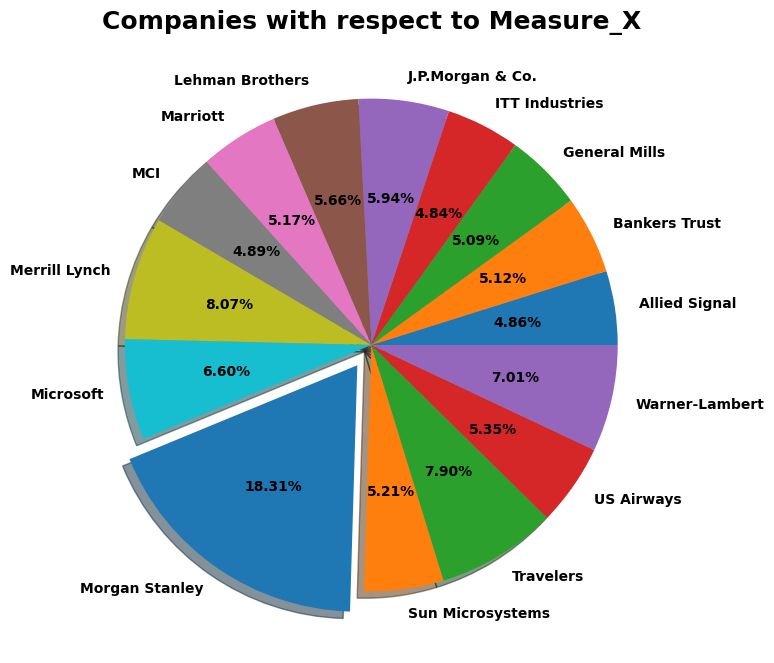

In [2]:
measure_x=[24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]
companies=['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways','Warner-Lambert']
plt.figure(figsize = (8,8))
plt.pie(measure_x,labels=companies,autopct='%.2f%%',shadow=True,
        explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
        textprops={'size':'medium',
                   'fontweight':'bold',
                   'color':'black'})
plt.title('Companies with respect to Measure_X',fontsize=18,fontweight='bold')
plt.show()

###### Finding Outliers

In [3]:
import numpy as np
Q1=np.percentile(measure_x,25)
Q3=np.percentile(measure_x,75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=[x for x in measure_x if x < lower_bound or x > upper_bound]
print("Outliers:",outliers)

Outliers: [91.36]


###### Visual representation of outlier using boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


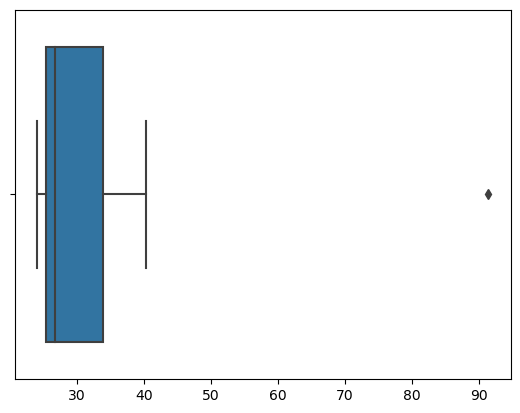

In [4]:
sns.boxplot(measure_x)
plt.show()

###### Finding mean, standard deviation & variance

In [5]:
mean=np.mean(measure_x)
std_dev=np.std(measure_x)
variance=np.var(measure_x)
print("μ:",mean)
print("σ:",std_dev)
print("σ^2:",variance)

μ: 33.27133333333333
σ: 16.370812590976932
σ^2: 268.00350488888887


# Set 2

## Question 1

The time required for servicing transmissions is normally distributed with mu = 45 minutes and standard deviation = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [6]:
import scipy.stats as stats
mu=45  # Mean
sigma=8  # Standard deviation

# Calculate the z-score for the time interval
x=50  # Time interval in minutes
z=(x-mu)/sigma

# Calculate the probability using the cumulative distribution function (CDF)
probability=1-stats.norm.cdf(z)

print(f"The probability that the service manager cannot meet his commitment is {probability:.4f}")

The probability that the service manager cannot meet his commitment is 0.2660


## Question 2

The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean = 38 and Standard deviation=6. For each statement below, please specify True/False. If false, briefly explain why.
+ A.More employees at the processing center are older than 44 than between 38 and 44.
+ B.A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

##### A

In [7]:
#calculating the probability of employees being older than 44
mu=38
sigma=6
probability_older_than_44=1-stats.norm.cdf(44,mu,sigma)
probability_older_than_44

0.15865525393145707

In [8]:
#calculating the probability of employees being between 38 and 44
probability_between_38_and_44=stats.norm.cdf(44,mu,sigma)-stats.norm.cdf(38,mu,sigma)
probability_between_38_and_44

0.3413447460685429

In [9]:
statement_A_true=probability_older_than_44>probability_between_38_and_44
statement_A_true

False

+ If probability_older_than_44 > probability_between_38_and_44, then the statement is true; otherwise, it's false.
+ Therefore the statement A is false.

##### B

In [10]:
#calculating the probability of employees being under the age of 30
probability_under_30=stats.norm.cdf(30,mu,sigma)
probability_under_30

0.09121121972586788

In [11]:
#If the number of employees at the center is 400, we can estimate the number of employees under the age of 30
expected_employees_under_30=probability_under_30*400
expected_employees_under_30

36.484487890347154

+ If expected_employees_under_30 is approximately 36, then the statement is true; otherwise, it's false.
+ Therefore the statement is true.

## Question 4

Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

In [12]:
mean=100
std_dev=20

# Find the z-score corresponding to the tail probability of 0.005
z=stats.norm.ppf(0.005)

# Calculate a and b
a=mean-z*std_dev
b=mean+z*std_dev

print(f"The values a and b symmetric about the mean are {a:.2f} and {b:.2f} respectively.")

The values a and b symmetric about the mean are 151.52 and 48.48 respectively.


## Question 5

Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
+ A)Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
+ B)Specify the 5th percentile of profit (in Rupees) for the company
+ C)Which of the two divisions has a larger probability of making a loss in a given year?

In [13]:
# Combine Mean Profit of both division for Company= mean1 + mean2
mean1=5
mean2=7
Mean=(mean1+mean2) # 1 USD = 45 rupees
print('The Mean Profit of both division:',Mean,'Million$')
print('The Mean Profit of both division:',(Mean*45)/10,'Crore Rupees')

# Combine standard Deviation = (Std1^2 + Std2^2)^1/2
std1=3**2
std2=4**2
Std=np.sqrt(std1+std2)
print('The Standard Deviation of both division:',Std,'Million$')
print('The Standard Deviation of both division:',(Std*45)/10,'Crore Rupees')

The Mean Profit of both division: 12 Million$
The Mean Profit of both division: 54.0 Crore Rupees
The Standard Deviation of both division: 5.0 Million$
The Standard Deviation of both division: 22.5 Crore Rupees


## A

In [14]:
r1,r2=np.round(stats.norm.interval(0.95,Mean,Std),2)
print('Rupee Ranges from',r1,'to',r2,'Million$ in Annual profit of the Company 95% of the time')
print('Rupee Ranges from',np.divide(np.multiply(r1,45),10),'to',np.divide(np.multiply(r2,45),10),'Crore Rupees in Annual profit of the Company 95% of the time')

Rupee Ranges from 2.2 to 21.8 Million$ in Annual profit of the Company 95% of the time
Rupee Ranges from 9.900000000000002 to 98.1 Crore Rupees in Annual profit of the Company 95% of the time


## B

In [15]:
# Z value  = X_bar - Mew / Std pop 
# for percentile, X_percentile = (Zvalue * Std pop) + Mew
Z_05_=stats.norm.ppf(0.05)
Fifth_percentile=(Z_05_ * Std)+Mean
print('The 5th percentile of Profit for the company is',np.round(Fifth_percentile,2),'Million$')
print('The 5th percentile of Profit for the company is',np.round((Fifth_percentile*45)/10,),'Crore Rupees')

The 5th percentile of Profit for the company is 3.78 Million$
The 5th percentile of Profit for the company is 17.0 Crore Rupees


## C

In [16]:
# The probability of Division #1 making a loss
print('The Probability of Division #1 making a loss is',np.round((stats.norm.cdf(0,5,3))*100,2),'%')

# The probability of Division #2 making a loss
print('The Probability of Division #2 making a loss is',np.round((stats.norm.cdf(0,7,4))*100,2),'%')

Division_1=(stats.norm.cdf(0,5,3))*100
Division_2=(stats.norm.cdf(0,7,4))*100

if Division_1>Division_2:
    print('The Division 1 has a larger Probability of making a loss')
else:
          print('The Division 2 has a larger Porbability of making a loss')

The Probability of Division #1 making a loss is 4.78 %
The Probability of Division #2 making a loss is 4.01 %
The Division 1 has a larger Probability of making a loss


# Set 3

## Question 5

In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.
+ If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

In [17]:
import math
from scipy.stats import norm

sample_proportion=0.046  # Sample proportion (4.6%)
sample_size=2000  # Sample size

null_hypothesis=0.05  # Null hypothesis: true population proportion is 5%

# Calculate the standard error
standard_error=math.sqrt((null_hypothesis*(1-null_hypothesis))/sample_size)

# Calculate the z-score
z_score=(sample_proportion-null_hypothesis)/standard_error

# Calculate the p-value
p_value=1-norm.cdf(z_score)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value<0.05:
    conclusion="Reject the null hypothesis"
else:
    conclusion="Fail to reject the null hypothesis"

print("p-value:",p_value)
print("Conclusion:",conclusion)

p-value: 0.794114967548929
Conclusion: Fail to reject the null hypothesis


# Set 4

## Question 3

3.Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

In [18]:
# Population parameters
population_mean=50
population_std=40

# Sample size
sample_size=100

# Calculate the standard error (SE)
se=population_std/(sample_size**0.5)

# Calculate the z-scores for the lower and upper limits
z_lower=(45-population_mean)/se
z_upper=(55-population_mean)/se

# Calculate the probability of investigation (probability outside the range)
prob_investigation=1-stats.norm.cdf(z_upper)+stats.norm.cdf(z_lower)

print("Probability of investigation:",prob_investigation)

Probability of investigation: 0.2112995473337107


## Question 4

4.The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.
+ A.144
+ B.150
+ C.196
+ D.250
+ E.Not enough information

In [19]:
## As z = (sample_mean-population-mean)/(standard deviation/sqrt(n))

## So 1.96 = 5 /(40/sqrt(n))
## => 1.96 = 5 * sqrt(n)/40
## => sqrt(n) = (1.96*40)/5

n = ((1.96*40)/5)**2
print("n =",n, ", round off to", round(n))

n = 245.86240000000004 , round off to 246


## Question 5

An educational startup that helps MBA aspirants write their essays is targeting individuals who have taken GMAT in 2012 and have expressed interest in applying to FT top 20 b-schools. There are 40000 such individuals with an average GMAT score of 720 and a standard deviation of 120. The scores are distributed between 650 and 790 with a very long and thin tail towards the higher end resulting in substantial skewness. Which of the following is likely to be true for randomly chosen samples of aspirants?
+ A.The standard deviation of the scores within any sample will be 120.
+ B.The standard deviation of the mean of across several samples will be 120.
+ C.The mean score in any sample will be 720.
+ D.The average of the mean across several samples will be 720.
+ E.The standard deviation of the mean across several samples will be 0.60

In [20]:
import numpy as np

# Population parameters
population_mean=720
population_std=120

# Number of individuals in the population
population_size=40000

# Range of GMAT scores
min_score=650
max_score=790

# Number of samples to generate
num_samples=1000

# Sample size
sample_size=100

# Simulate random sampling
sample_means=[]
sample_std=[]
sample_skewness=[]

for _ in range(num_samples):
    # Generate a random sample
    sample=np.random.uniform(min_score,max_score,sample_size)
    
    # Calculate statistics for the sample
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
    
    sample_std.append(np.std(sample,ddof=1))
    
    sample_skewness.append((np.mean((sample-np.mean(sample))**3))/np.power(np.mean((sample-np.mean(sample))**2),1.5))

# Calculate the mean and standard deviation of the sample means
mean_of_means=np.mean(sample_means)
std_of_means=np.std(sample_means,ddof=1)

# Output the results
print("Mean of the sample means:",mean_of_means)
print("Standard deviation of the sample means:",std_of_means)

print("Average standard deviation of the sample:",np.mean(sample_std))

print("Average skewness of the sample:",np.mean(sample_skewness))

Mean of the sample means: 720.0113414870407
Standard deviation of the sample means: 4.036334017775748
Average standard deviation of the sample: 40.41714432330085
Average skewness of the sample: -0.0048417762151906595
